In [1]:
# SET UP (it will take a long time to run)
using Pkg; Pkg.activate("C:/Users/nicot/GitHub/Tutorial_DynMacro")
using Plots; using Optim; using Interpolations; using LinearAlgebra
Pkg.status()

  Activating environment at `C:\Users\nicot\GitHub\Tutorial_DynMacro\Project.toml`

      Status `D:\GitHub\Tutorial_DynMacro\Project.toml`
 

 [429524aa] Optim v1.4.1


# Why VFI works for eating a cake? 

As stated before, the key idea is that $T$ is a *contraction*. What does it means?

## The supremum norm

When we work with vectors we can get around with the *Pitagorean?* norm as we saw above, but since the underlaying concepts that we approximate is a continuos function, when we go to theory we must think in that way. So the challenge appears again: how to measure *distance* between two functions. One way of doing so is using de *supremum norm* to biuld this.

First: What was that *supremum* thing? Keeping it simple, the supremum is the smallest uuper bound, and if it is attainable it is also a maximum. Try to answer these questions: ¿What is the maximum of A? ¿What is the maximum of B?
$$
A=\{1,2,3,4\}
$$
$$
B=\{x:x<2\}
$$

Recall the example of the "day before the world ends" we know that $V_{T-1}(K)=max_{c}\{ln(c)+\beta ln(K-c)\}$ ¿Is it right to write $max$? Yes, even more the maximum is interior (it isn't at $c=0$ or $c=K$). ¿Is it right to use $max$ for the following iterations? ¿Are the following maximums interior? (¿Are the following iterations of the value function concave?).

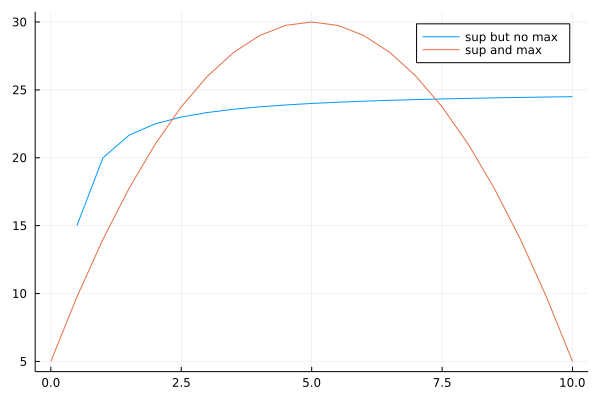

In [2]:
f_1(x)=25-5/x
f_2(x)=5+10x-x^2
xs=0:0.5:10
plot(xs,f_1.(xs),label="sup but no max")
plot!(xs,f_2.(xs),label="sup and max")

The *supremum norm* of a function $f$ is $sup|f|$. It is the *supremum* of the absolute value of a function.

Whithout precision. What is the *suprem norm* of this function? (in that interval)

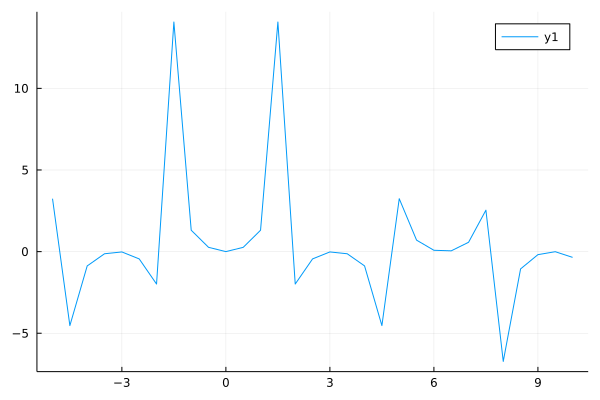

In [4]:
f_1(x)=sin(x)tan(x)
xs=-5:0.5:10
plot(xs,f_1.(xs))

And what is the *suprem norm* of this other function?

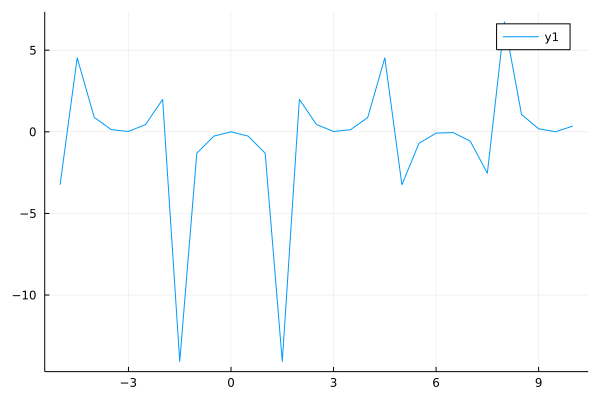

In [5]:
f_1(x)=-sin(x)tan(x)
xs=-5:0.5:10
plot(xs,f_1.(xs))

To think: What kind of functions have a finete norm? Could it have a real *supremum* but no real *infimum*? What does it mean that a function has no real *infimum* or *supremum*?

To calculate the *distance* between two functions following the *supremum norm* we do: $d(f,g)=sup|f-g|$

In which pair the functions are more *distant* from each other? Can you guess what is the *distance* between those two functions?

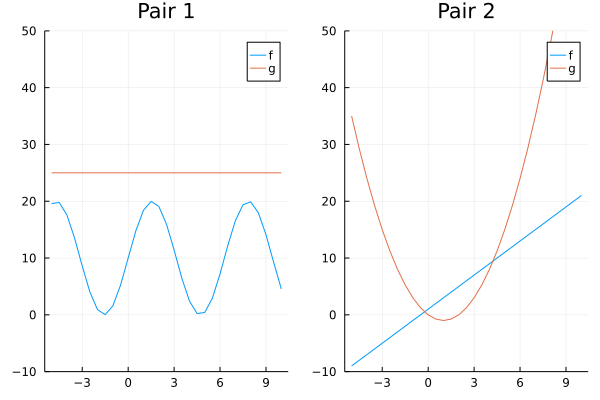

In [6]:
f_1(x)=10sin(x)+10
f_2(x)=25
f_3(x)=2x+1
f_4(x)=-2x+x^2
xs=-5:0.5:10
p1=plot(xs,f_1.(xs),title="Pair 1", ylim=(-10,50),label="f")
p1=plot!(p1,xs,f_2.(xs),label="g")
p2=plot(xs,f_3.(xs),title="Pair 2", ylim=(-10,50),label="f")
p2=plot!(p2,xs,f_4.(xs),label="g")
plot(p1,p2, layout=(1,2))

In the simple cake eating problem $V_n(K)$ and $u_n(K)$ are univariate real concave functions.

The objective function of the Bellman equation is $U_n(c,K)=u(c)+\beta V_n(K-c)$.

So $V_{n+1}=sup_c\big\{U_n(c,K)\big\}$


It is easy to see that $ sup_c\big\{U_n(c,K)\big\}=sup_c\big\{U_n(c,K)+U_{n+1}(c,K)-U_{n+1}(c,K)\big\} $

A little more difficult to see is:  $ sup_c\big\{U_n(c,K)+U_{n+1}(c,K)-U_{n+1}(c,K)\big\} \leq sup_c\big\{U_n(c,K)-U_{n+1}(c,K)\big\}+sup_c\big\{U_{n+1}(c,K)\big\} $

For a given $K$, we can restate the above as  $ sup\{f(x)+g(x)\} \leq sup\{f(x)\}+sup\{g(x)\} $

With $f$ and $g$ being some nice real continuos univariate functions. So we can think in the plane.

The *supremum* of those functions could be in the interior or when the independent variable tends to infinity (plus or minus). Let's suppose that both functions have a *supremum* "located" in the same place, so the above inequality became an equality. For example:

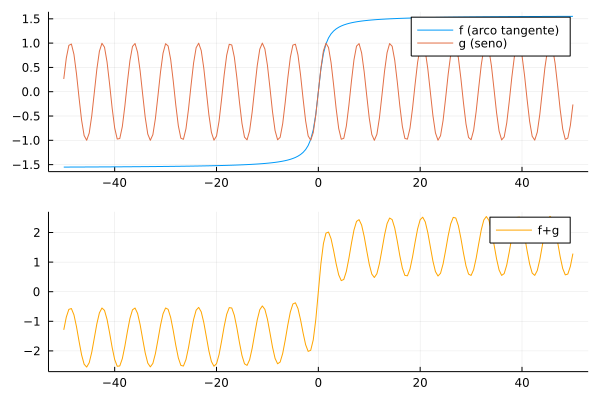

In [7]:
f_1(x)=atan(x)
f_2(x)=sin(x)
f_3(x)=atan(x)+sin(x)
xs=-50:0.5:50
p1=plot(xs,f_1.(xs),label="f (arco tangente)")
p1=plot!(p1,xs,f_2.(xs),label="g (seno)")
p2=plot(xs,f_3.(xs),label="f+g",color=:orange)
plot(p1,p2, layout=(2,1))

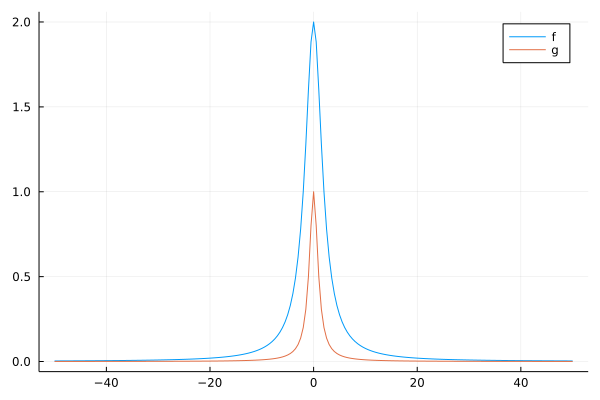

In [8]:
f_1(x)=8/(x^2+4)
f_2(x)=1/(x^2+1)
xs=-50:0.5:50
plot(xs,f_1.(xs),label="f")
plot!(xs,f_2.(xs),label="g")

Let's suppose that isn't tha case. For example:

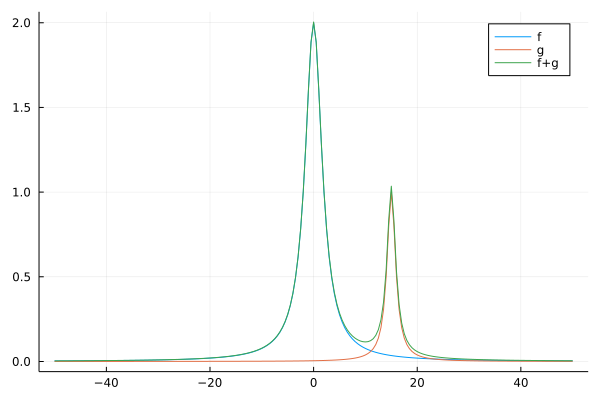

In [9]:
f_1(x)=8/(x^2+4)
f_2(x)=1/((x-15)^2+1)
f_3(x)=f_1(x)+f_2(x)
xs=-50:0.5:50
plot(xs,f_1.(xs),label="f")
plot!(xs,f_2.(xs),label="g")
plot!(xs,f_3.(xs),label="f+g")

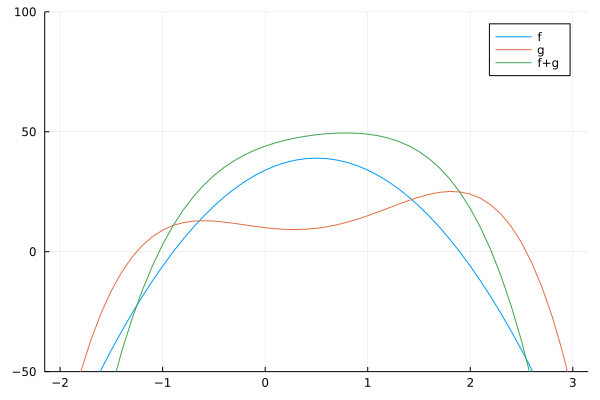

In [10]:
f_1(x)=-20x^2+20x+34
f_2(x)=-4x^4+8x^3+6x^2-5x+10
f_3(x)=f_1(x)+f_2(x)
@show 
xs=-2:0.1:3
plot(xs,f_1.(xs),label="f",ylim=(-50,100))
plot!(xs,f_2.(xs),label="g")
plot!(xs,f_3.(xs),label="f+g")

It is quite clear when both *supremums* are finite interior points, that is they are both *maximums*, that the equality doesn't hold. With this we could intuitively agree that for any given $K$:
$$
sup_c\big\{U_n(c,K)\big\}=sup_c\big\{U_n(c,K)+U_{n+1}(c,K)-U_{n+1}(c,K)\big\} \leq sup_c\big\{U_n(c,K)-U_{n+1}(c,K)\big\}+sup_c\big\{U_{n+1}(c,K)\big\} 
$$

Therefore,
$$
sup_c\big\{U_n(c,K)\big\} \leq sup_c\big|U_n(c,K)-U_{n+1}(c,K)\big|+sup_c\big\{U_{n+1}(c,K)\big\}
$$

So,
$$
sup_c\big\{U_n(c,K)\big\}-sup_c\big\{U_{n+1}(c,K)\big\} \leq sup_c\big|U_n(c,K)-U_{n+1}(c,K)\big|
$$

And with the same logic we can conclude that,
$$
sup_c\big\{U_{n+1}(c,K)\big\}-sup_c\big\{U_n(c,K)\big\} \leq sup_c\big|U_{n+1}(c,K)-U_n(c,K)\big|
$$

Therefore we arrive to
$$
\Big|sup_c\big\{U_n(c,K)\big\}-sup_c\big\{U_{n+1}(c,K)\big\}\Big| \leq sup_c\big|U_n(c,K)-U_{n+1}(c,K)\big|
$$


Working in the left side we have:
$$
\Big|V_{n+1}(K)-V_{n+2}(K)\Big|
$$

And the right side
$$
sup_c\big|u(c)+\beta V_n(K-c)-u(c)-\beta V_{n+1}(K-c)\big|=\beta sup_c\big|V_n(K-c)-V_{n+1}(K-c)\big|
$$

Taking the $sup$ controling by $c$ is the same as introducing the restricion $K'=K-c$, and control by $K'$

$$
\beta sup_c\big|V_n(K-c)-V_{n+1}(K-c)\big|=\beta sup_K'\big|V_n(K')-V_{n+1}(K')\big|=\beta\;\Big|\Big|V_n-V_{n+1}\Big|\Big|_\infty
$$

So we have that
$$
\Big|V_{n+1}(K)-V_{n+2}(K)\Big|  \leq \beta\; \Big|\Big|V_n-V_{n+1}\Big|\Big|_\infty
$$

For any value of $K$, even for the *supremum*, so
$$
\Big|\Big|V_{n+1}(K)-V_{n+2}(K)\Big|\Big|_\infty  \leq \beta\; \Big|\Big|V_n-V_{n+1}\Big|\Big|_\infty
$$

Since, $0<\beta<1$ we finally arrive to
$$
\Big|\Big|V_{n+1}(K)-V_{n+2}(K)\Big|\Big|_\infty  < \Big|\Big|V_n-V_{n+1}\Big|\Big|_\infty
$$

This is saying that the *distance* between each iteration is getting samaller with $n$. In other words, as we iterate the values function keep getting more and more similar.

Can you prove that T is *monotone*?

This proof is specific to the simple cake eating problem, but has the essence of the more general proof. The aim of this notebook is to connect the aplication with the theory, and make it easier to understand, it is an invitation to study the theory.